In [1]:
import wandb
import torch
from torch.utils.data import Dataset, DataLoader, Subset, ConcatDataset, TensorDataset
import os
import matplotlib.pyplot as plt

In [2]:
os.chdir('/home/xiaochen/kewen/IF_project')


In [3]:
class FolderDataset(Dataset):
   def __init__(self, folder):
       self.folder = folder
   def __len__(self):
       return len(self.files)
   def __getitem__(self, idx):
       return torch.load(f"{self.folder}/tensor{idx}.pt")

In [3]:
wandb.init(
    project="IF_PROJECT",
    name = "test1"
)

wandb: Currently logged in as: hage1005 (use `wandb login --relogin` to force relogin)


Text(0.5, 1.0, 'bars with legend')

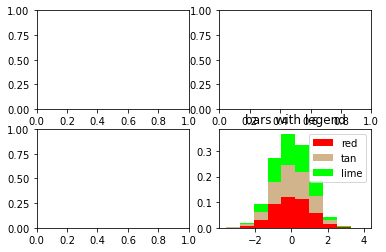

In [8]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

n_bins = 10
x = np.random.randn(1000, 3)

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)

colors = ['red', 'tan', 'lime']
plt.hist(x, n_bins, density=True, histtype='bar', color=colors, label=colors, stacked= True)
plt.legend(prop={'size': 10})
plt.title('bars with legend')

In [7]:
x[0]

array([1.04930431, 0.86609917, 0.5511346 ])

In [11]:
test_data = FolderDataset("data/cifar10/test/original_sampled")

In [58]:
CLASS_MAP = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']									

In [59]:
helpful = list(range(9))

In [60]:
for i in range(9):
    x, y = test_data[helpful[i]]
    wandb.run.summary[f"helpful_{i}"] = wandb.Image(test_data[helpful[i]][0])
    Image = wandb.Image(test_data[helpful[i]][0], caption=f"{CLASS_MAP[y]}, id:{i}, influence=0.1")
    wandb.log({f"helpful_{i}": Image})

In [61]:
wandb.run.summary[f"helpful_{i}"] = wandb.Image(test_data[helpful[i]][0])

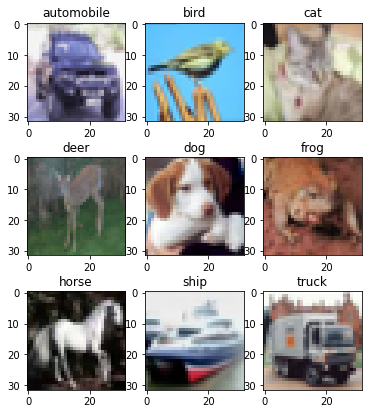

In [68]:
fig = plt.figure(figsize=(6, 7))
for i in range(1,10):
    x, y = test_data[i]
    fig.add_subplot(3,3,i)
    plt.title(CLASS_MAP[y])
    plt.imshow(x)

In [55]:
wandb.log({"grid": fig})

In [3]:
from torchvision import transforms

In [16]:
trans = transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
trans_tensor = transforms.ToTensor()

In [17]:
img_tensor = trans_tensor(test_data[0][0])

In [18]:
trans(img_tensor)

tensor([[[2.5141, 2.5141, 2.5141,  ..., 2.5141, 2.5141, 2.5141],
         [2.5141, 2.4947, 2.4947,  ..., 2.4947, 2.4947, 2.4947],
         [2.5141, 2.4947, 2.5141,  ..., 2.5141, 2.5141, 2.5141],
         ...,
         [2.5141, 2.4947, 2.5141,  ..., 2.5141, 2.5141, 2.5141],
         [2.5141, 2.4947, 2.5141,  ..., 2.5141, 2.5141, 2.5141],
         [2.5141, 2.4947, 2.5141,  ..., 2.5141, 2.5141, 2.5141]],

        [[2.5968, 2.5968, 2.5968,  ..., 2.5968, 2.5968, 2.5968],
         [2.5968, 2.5771, 2.5771,  ..., 2.5771, 2.5771, 2.5771],
         [2.5968, 2.5771, 2.5968,  ..., 2.5968, 2.5968, 2.5968],
         ...,
         [2.5968, 2.5771, 2.5968,  ..., 2.5968, 2.5968, 2.5968],
         [2.5968, 2.5771, 2.5968,  ..., 2.5968, 2.5968, 2.5968],
         [2.5968, 2.5771, 2.5968,  ..., 2.5968, 2.5968, 2.5968]],

        [[2.7537, 2.7537, 2.7537,  ..., 2.7537, 2.7537, 2.7537],
         [2.7537, 2.7342, 2.7342,  ..., 2.7342, 2.7342, 2.7342],
         [2.7537, 2.7342, 2.7537,  ..., 2.7537, 2.7537, 2.